In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
df=pd.read_csv("AIML Dataset.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.drop(columns="step", inplace=True)

In [9]:
df_model= df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [10]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [11]:
categorical= ["type"]
numeric= ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [12]:
y= df_model["isFraud"]
X= df_model.drop("isFraud", axis= 1)

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [14]:
preprocessor= ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [15]:
pipeline= Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

In [16]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
y_pred= pipeline.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [19]:
confusion_matrix(y_test, y_pred)

array([[1202380,   68501],
       [     93,    1550]])

In [20]:
pipeline.score(X_test, y_test)* 100

94.60961050636372

In [30]:
y_probs = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.9
y_pred_thresh = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh) * 100)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.10      0.75      0.18      1643

    accuracy                           0.99   1272524
   macro avg       0.55      0.87      0.59   1272524
weighted avg       1.00      0.99      0.99   1272524

Precision: 10.172002304337092


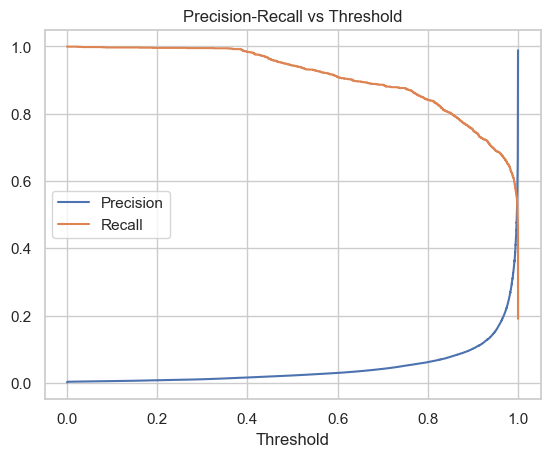

In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision-Recall vs Threshold")
plt.show()

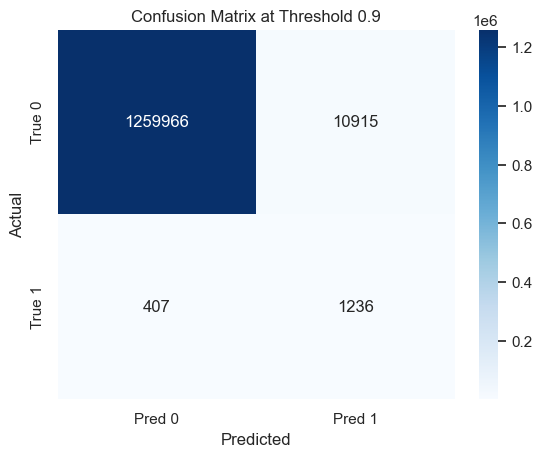

In [32]:
cm = confusion_matrix(y_test, y_pred_thresh )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title(f"Confusion Matrix at Threshold 0.9")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
